In [10]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
from matplotlib.patches import Patch

In [11]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("../data/breast_cancer_dataset.csv")
df.head(5)

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


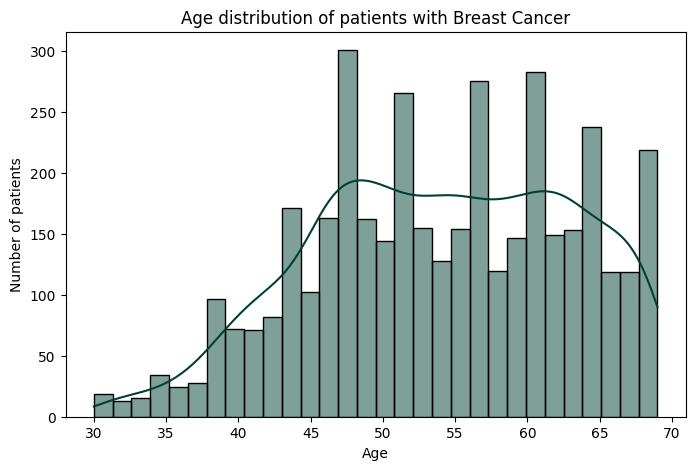

In [3]:
colors = (1/255,64/255,52/255)
df = pd.read_csv("../data/breast_cancer_dataset.csv")
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=30, kde=True, color=colors)
plt.title("Age distribution of patients with Breast Cancer")
plt.xlabel("Age")
plt.ylabel("Number of patients")
plt.show()

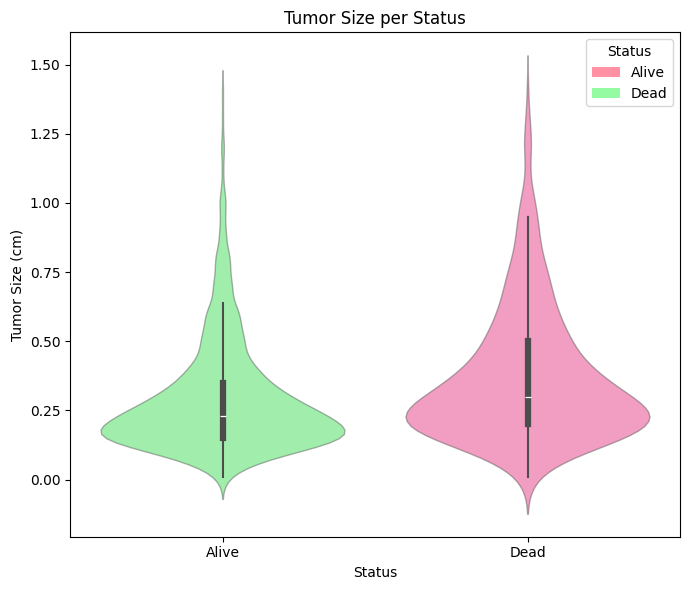

In [17]:
df = pd.read_csv("../data/breast_cancer_dataset.csv")

df["Tumor Size"] = df["Tumor Size"] / 100

col_x = "Status"
col_y = "Tumor Size"

plt.figure(figsize=(7, 6))

# Palette con alpha
alpha_val = 0.43
palette_rgba = {
    "Alive": (7/255, 247/255, 43/255),   # verde con alpha
    "Dead":  (255/255, 0/255, 111/255)   # rosa/rosso con alpha
}

ax = sns.violinplot(
    data=df,
    x=col_x,
    y=col_y,
    hue=col_x,
    palette=palette_rgba,
    inner="box",      # mostra box plot interno
    linewidth=1,
    alpha = alpha_val
)

plt.xlabel("Status")
plt.ylabel("Tumor Size (cm)")
plt.title("Tumor Size per Status")

# Legenda all'interno del grafico
handles = [
    Patch(facecolor="#ff002b", alpha=0.43, label="Alive"),
    Patch(facecolor="#07f72b", alpha=0.43, label="Dead")
]
ax.legend(handles=handles, title="Status")

plt.tight_layout()
plt.show()




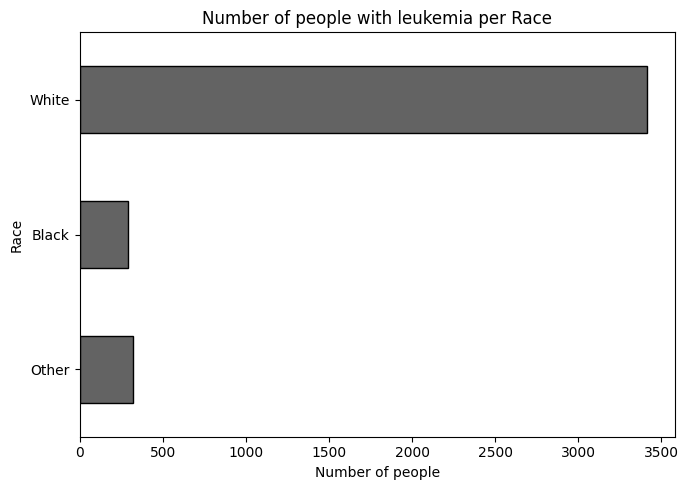

In [14]:


df = pd.read_csv("../data/breast_cancer_dataset.csv")

plt.figure(figsize=(7,5))

# Ordine personalizzato delle razze
race_order = ["Other", "Black", "White"]

# Conta le persone per razza
race_counts = df['Race'].value_counts()

# Ricostruisci la Serie nell'ordine desiderato
race_counts = race_counts.reindex(race_order)

# Palette grigia
palette = (99/255, 99/255, 99/255)

# Grafico a barre orizzontali
race_counts.plot(kind='barh', color=palette, edgecolor='black')

plt.title("Number of people with leukemia per Race")
plt.xlabel("Number of people")
plt.ylabel("Race")
plt.tight_layout()
plt.show()



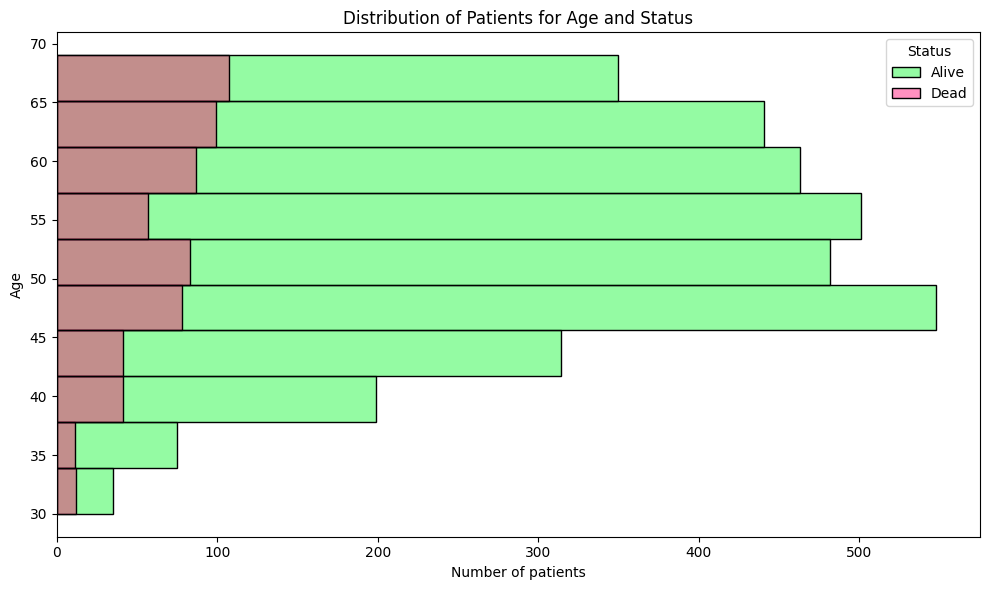

In [15]:
df = pd.read_csv("../data/breast_cancer_dataset.csv")
# Palette personalizzata con alpha incorporato
palette = {
    "Alive": (* (7/255, 247/255, 43/255), 0.43),  # verde con alpha
    "Dead":  (* (255/255, 0/255, 111/255), 0.43)  # rosa/rosso con alpha
}

# Definiamo i bins (10 intervalli tra min e max dell'età)
bins = np.linspace(df["Age"].min(), df["Age"].max(), 11)

plt.figure(figsize=(10,6))

# Istogramma orizzontale per ogni Status
for status in ["Alive", "Dead"]:
    plt.hist(
        df.loc[df["Status"] == status, "Age"],
        bins=bins,
        label=status,
        edgecolor='black',
        orientation="horizontal",
        color=palette[status]  # alpha incluso
    )

plt.xlabel("Number of patients")
plt.ylabel("Age")
plt.title("Distribution of Patients for Age and Status")
plt.legend(title="Status")
plt.tight_layout()
plt.show()







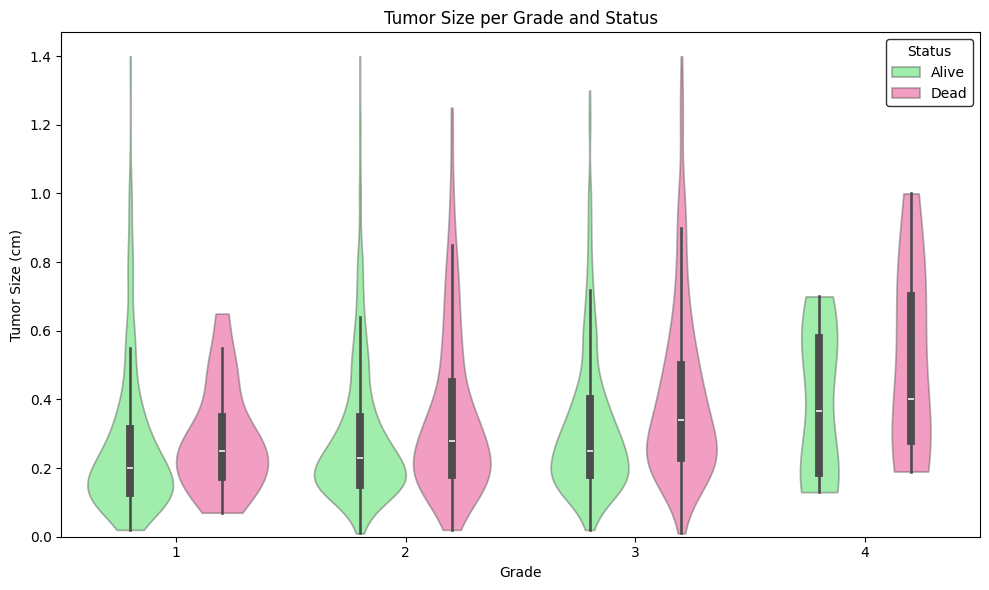

In [16]:
df = pd.read_csv("../data/breast_cancer_dataset.csv")

df["Tumor Size"] = df["Tumor Size"] / 100

# Sostituisci "anaplastic; Grade IV" con "4"
df['Grade'] = df['Grade'].replace({' anaplastic; Grade IV': '4'})

# Convertiamo Grade in interi per ordinamento
df['Grade'] = df['Grade'].astype(int)

# Ordine dei gradi
grade_order = [1, 2, 3, 4]

plt.figure(figsize=(10,6))

# Violinplot
sns.violinplot(
    data=df,
    x="Grade",
    y="Tumor Size",
    hue="Status",
    order=grade_order,
    inner="box",
    palette={"Alive": (7/255, 247/255, 43/255), "Dead": (255/255, 0/255, 111/255)},
    cut=0,
    alpha = 0.43
)

plt.title("Tumor Size per Grade and Status")
plt.xlabel("Grade")
plt.ylabel("Tumor Size (cm)")
plt.ylim(0, None)  # Asse y parte da 0

# Legenda all'interno del grafico
plt.legend(title="Status", loc='upper right', frameon=True, facecolor='white', edgecolor='black')

plt.tight_layout()
plt.show()








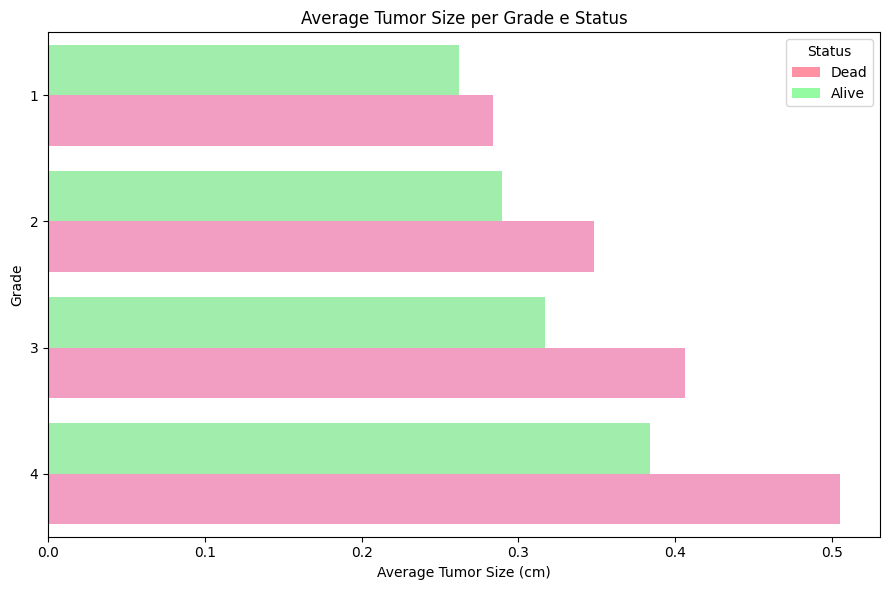

In [18]:
df = pd.read_csv("../data/breast_cancer_dataset.csv")

df["Tumor Size"] = df["Tumor Size"] / 100

# Sostituisci "anaplastic; Grade IV" con "4"
df['Grade'] = df['Grade'].replace({
    ' anaplastic; Grade IV': '4'
})

# Calcolo della grandezza media del tumore per ogni Grade e Status
grouped = (
    df.groupby(["Grade", "Status"])["Tumor Size"]
      .mean()
      .reset_index()
)

# Palette personalizzata
palette = {
    "Alive": (7/255, 247/255, 43/255),   # verde
    "Dead": (255/255, 0/255, 111/255)    # rosa/rosso
}

plt.figure(figsize=(9,6))
ax = sns.barplot(
    data=grouped,
    x="Tumor Size",
    y="Grade",
    hue="Status",
    palette=palette,
    orient="h"
)

for bars in ax.containers:
    for bar in bars:
        bar.set_alpha(0.43)

handles = [
    Patch(facecolor="#ff002b", alpha=0.43, label="Dead"),
    Patch(facecolor="#07f72b", alpha=0.43, label="Alive")
]
ax.legend(handles=handles, title="Status")

plt.xlabel("Average Tumor Size (cm)")
plt.ylabel("Grade")
plt.title("Average Tumor Size per Grade e Status")


plt.tight_layout()
plt.show()



/var/folders/6_/rzvng5pn14z9kc8qw_hjns_40000gn/T/ipykernel_26045/2946484972.py:23: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data = df_filtered.pivot_table(


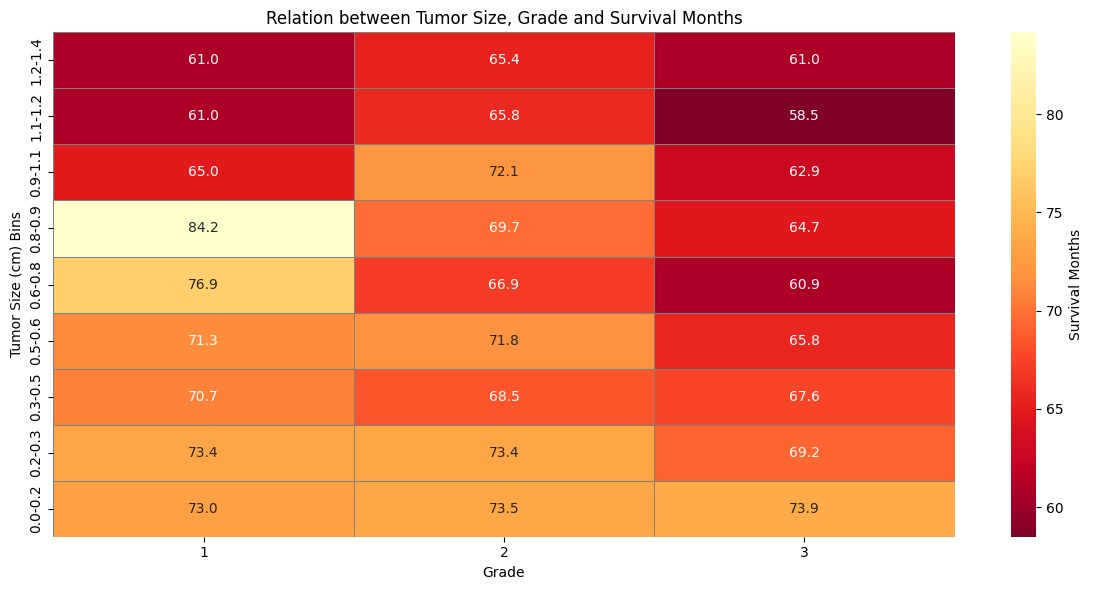

In [9]:
df = pd.read_csv("../data/breast_cancer_dataset.csv")
# Normalizza la colonna Grade
df['Grade'] = df['Grade'].astype(str).str.strip()



# Filtra righe con Grade > 0
df_filtered = df[df['Grade'].str.isnumeric()].copy()
df_filtered['Grade'] = df_filtered['Grade'].astype(int)
df_filtered = df_filtered[df_filtered['Grade'] > 0]



# Converti Tumor Size in cm
df_filtered['Tumor Size (cm)'] = df_filtered['Tumor Size'] / 100

# Creiamo dei bins per Tumor Size
bins = np.linspace(df_filtered['Tumor Size (cm)'].min(), df_filtered['Tumor Size (cm)'].max(), 10)
labels = [f"{round(bins[i],1)}-{round(bins[i+1],1)}" for i in range(len(bins)-1)]
df_filtered['Tumor Size Bin'] = pd.cut(df_filtered['Tumor Size (cm)'], bins=bins, labels=labels, include_lowest=True)

# Pivot table con media della sopravvivenza
heatmap_data = df_filtered.pivot_table(
    index='Tumor Size Bin',
    columns='Grade',
    values='Survival Months',
    aggfunc='mean'
)

# Invertiamo l'ordine delle righe: dimensioni piccole in basso
heatmap_data = heatmap_data.iloc[::-1]

# Plot
plt.figure(figsize=(12,6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".1f",
    cmap="YlOrRd_r",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Survival Months'},
    mask=heatmap_data.isna()  # le celle NaN rimangono trasparenti
)
plt.title("Relation between Tumor Size, Grade and Survival Months")
plt.xlabel("Grade")
plt.ylabel("Tumor Size (cm) Bins")
plt.tight_layout()
plt.show()

